In [6]:
import torch
from diffusers import StableDiffusionPipeline

# set seed to 1000
torch.manual_seed(1000)

# model_id = "CompVis/stable-diffusion-v1-4"
# device = "cuda"


# pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

prompt = ["a photo of an astronaut riding a horse on mars"] * 5
image = pipe(prompt).images
    
for i, img in enumerate(image):
    img.save(f"sample_{i}.png")

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# use gpu 2,3
CUDA_VISIBLE_DEVICES=0,1,3 accelerate launch --config_file accelerator_gpu.json  --mixed_precision="fp16"  text_to_image_full_memory.py  --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4" --dataset_name="mimic-cxr" --use_ema --resolution=224 --center_crop --random_flip --train_batch_size=24  --gradient_accumulation_steps=1 --gradient_checkpointing --max_train_steps=10000 --learning_rate=0.0001  --lr_scheduler="constant" --lr_warmup_steps=0 --output_dir="./checkpoints/mimic-mlp-0001"

In [11]:
with open("/local/home/hhamidi/t_dif/diffusers/examples/text_to_image/dataset/labels.txt") as f:
    all_labels = f.readlines()

all_labels = [[float(i) for i in label.replace('\n', '').split(',')] for label in all_labels]
all_labels


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [35]:
all_prompts= '''
No Finding
Fracture
No Finding
Fracture; Support Devices
Atelectasis; Lung Opacity; Effusion; Pneumonia; Support Devices
Effusion
Atelectasis; Cardiomegaly; Lung Opacity
Atelectasis; Cardiomegaly; Support Devices
Atelectasis; Cardiomegaly; Edema; Support Devices
Atelectasis; Effusion
No Finding
Support Devices
No Finding
Pneumonia
No Finding
Atelectasis; Fracture; Pneumothorax
Effusion
No Finding
No Finding
Atelectasis; Cardiomegaly; Edema; Effusion
Atelectasis; Lung Opacity; Effusion; Support Devices
No Finding
Consolidation; Lung Opacity; Effusion
Atelectasis; Pneumothorax
No Finding
Edema
Cardiomegaly; Effusion; Pneumothorax; Support Devices
No Finding
Cardiomegaly; Pneumothorax; Support Devices
No Finding
No Finding
Edema; Support Devices
No Finding
Effusion; Support Devices
No Finding
Atelectasis
Cardiomegaly; Lung Opacity; Effusion; Support Devices
Lung Lesion
No Finding
Atelectasis; Effusion
No Finding
Atelectasis; Edema; Pneumonia
No Finding
Atelectasis; Cardiomegaly; Lung Opacity; Effusion; Support Devices
No Finding
Atelectasis; Support Devices
Atelectasis; Support Devices
No Finding
No Finding
'''
all_prompts = all_prompts.split("\n")


In [36]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

model_path = "/local/home/hhamidi/t_dif/diffusers/examples/text_to_image/mimic-lr00005-second-round-training"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

all_images = pipe(prompt=all_prompts).images








Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


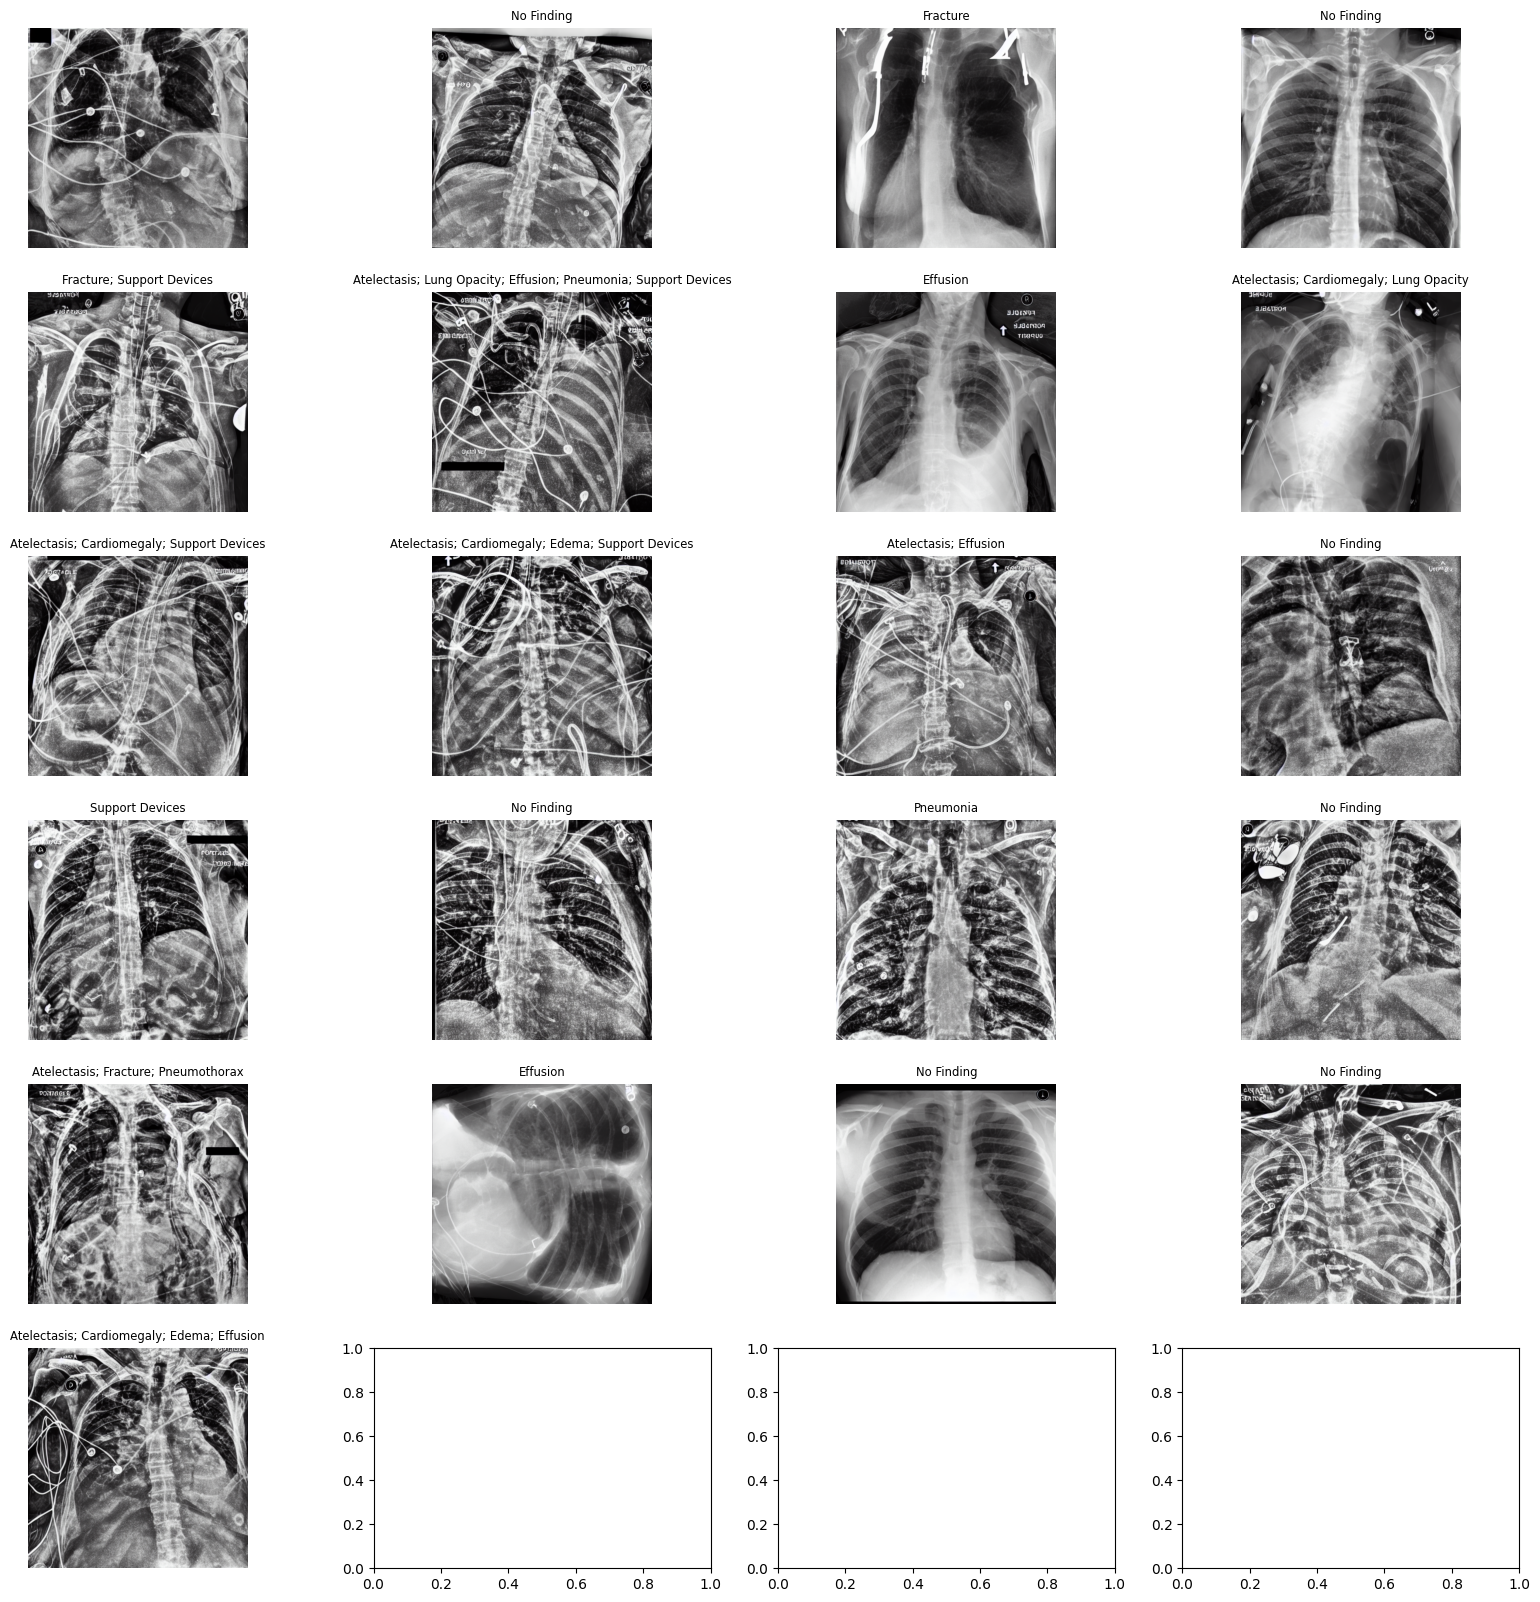

In [34]:
# plot the images + prompts as titles with font size of small

fig, axs = plt.subplots(6, 4, figsize=(20, 20))
for i, img in enumerate(all_images):
    ax = axs[i//4, i%4]
    ax.set_title(all_prompts[i], fontsize="small")
    ax.imshow(img)
    ax.axis("off")


In [1]:
# Text embedding save
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
from transformers import CLIPTextModel, CLIPTokenizer   

model_path = "CompVis/stable-diffusion-v1-4"
        # #        inputs = tokenizer(
        #     captions, max_length=tokenizer.model_max_length, padding="max_length", truncation=True, return_tensors="pt"
        # )
CLIPTokenizer_OBJ = CLIPTokenizer.from_pretrained(model_path, subfolder="tokenizer")
CLIPTextModel_OBJ = CLIPTextModel.from_pretrained(model_path, subfolder="text_encoder")


def get_text_embedding(text):
    inputs = CLIPTokenizer_OBJ(text, max_length=CLIPTokenizer_OBJ.model_max_length, padding="max_length", truncation=True, return_tensors="pt")
    with torch.no_grad():

        outputs = CLIPTextModel_OBJ(**inputs)
    return outputs.last_hidden_state.mean(dim=1).cpu().numpy()


promps = '''No Finding
Fracture
No Finding
Fracture; Support Devices
Atelectasis; Lung Opacity; Effusion; Pneumonia; Support Devices
Effusion
Atelectasis; Cardiomegaly; Lung Opacity
Atelectasis; Cardiomegaly; Support Devices
Atelectasis; Cardiomegaly; Edema; Support Devices
Atelectasis; Effusion'''

text = [t for  t in promps.split("\n") if t != ""]
text_embedding = get_text_embedding(text)
# calculate the cosine similarity between the text embeddings
# normalize text to have unit norm
print(text_embedding.shape)
text_embedding = text_embedding / np.linalg.norm(text_embedding, axis=1)[:, None]
# calculate the cosine similarity matrix
similarity_matrix = np.dot(text_embedding, text_embedding.T)
similarity_matrix





(10, 768)


array([[0.9999999 , 0.8428525 , 0.9999999 , 0.7569207 , 0.6379691 ,
        0.82919747, 0.7448603 , 0.71046406, 0.65168303, 0.7815491 ],
       [0.8428525 , 0.9999999 , 0.8428525 , 0.88779736, 0.67991966,
        0.8571255 , 0.7539227 , 0.7248702 , 0.6703545 , 0.80690944],
       [0.9999999 , 0.8428525 , 0.9999999 , 0.7569207 , 0.6379691 ,
        0.82919747, 0.7448603 , 0.71046406, 0.65168303, 0.7815491 ],
       [0.7569207 , 0.88779736, 0.7569207 , 1.0000001 , 0.6893945 ,
        0.7759929 , 0.7077724 , 0.7570152 , 0.70987654, 0.76006764],
       [0.6379691 , 0.67991966, 0.6379691 , 0.6893945 , 0.9999999 ,
        0.7435988 , 0.9021337 , 0.880908  , 0.885821  , 0.8866849 ],
       [0.82919747, 0.8571255 , 0.82919747, 0.7759929 , 0.7435988 ,
        0.99999976, 0.77709985, 0.754032  , 0.7145549 , 0.89886725],
       [0.7448603 , 0.7539227 , 0.7448603 , 0.7077724 , 0.9021337 ,
        0.77709985, 0.9999995 , 0.93533766, 0.90390825, 0.91012883],
       [0.71046406, 0.7248702 , 0.7104640

In [2]:
import time
import torch
import numpy as np

# Measure the time to read the file
start_time = time.time()
with open("/local/home/hhamidi/codes/diffusers/examples/text_to_image/img_path.txt") as f:
    all_images = f.readlines()
all_latents = [x.replace("\n","_latent.npy").replace("physionet.org","vae_latent") for x in all_images][0:256]
read_file_time = time.time() - start_time

# Measure the time to load the latent tensors
start_time = time.time()

examples = [torch.tensor(np.load(latent_path.strip())) for latent_path in all_latents]
# stack the tensors
latents = torch.stack(examples)
load_tensors_time = time.time() - start_time

# Print the timings
print(f"Time to read the file: {read_file_time:.6f} seconds")
print(f"Time to load the latent tensors: {load_tensors_time:.6f} seconds")


Time to read the file: 0.199834 seconds
Time to load the latent tensors: 0.105190 seconds


In [3]:
latents

tensor([[[[-3.1308e+00, -7.7681e-01, -1.3261e+00,  ..., -5.5334e+00,
            8.2288e-01,  4.4930e+00],
          [-1.0797e+00, -7.7911e-01, -1.3593e-01,  ..., -4.5574e+00,
            1.8299e-01, -3.8963e+00],
          [ 1.4955e+00,  2.7548e-01, -4.4148e-01,  ..., -2.3899e+00,
            1.2390e+00, -3.5927e+00],
          ...,
          [ 1.1426e+01,  1.2657e+01,  5.0778e+00,  ...,  3.3762e+00,
           -8.3162e-01, -1.6337e+00],
          [ 1.3293e+01,  1.1224e+01,  4.7967e+00,  ...,  2.0795e+00,
           -3.2949e-02, -3.6482e+00],
          [ 1.1559e+01,  1.4428e+01,  1.0641e+01,  ..., -3.6015e+00,
           -6.0849e+00, -7.3868e+00]],

         [[-6.6528e+00, -6.7229e+00, -5.7454e+00,  ..., -8.6343e+00,
           -7.2836e+00, -1.0237e+01],
          [-6.3195e+00, -7.8500e+00, -1.0274e+01,  ..., -7.2108e+00,
           -1.5085e+01, -1.0703e+01],
          [-6.8299e+00, -7.0045e+00, -9.4911e+00,  ..., -5.8943e+00,
           -1.3284e+01, -9.0386e+00],
          ...,
     

In [12]:
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained("/local/home/hhamidi/t_dif/diffusers/examples/text_to_image/models--CompVis--stable-diffusion-v1-4", torch_dtype=torch.float16)
prompt = "Pokemon with yellow eyes"
image = pipeline(prompt).images[0]


OSError: Error no file named model_index.json found in directory /local/home/hhamidi/t_dif/diffusers/examples/text_to_image/models--CompVis--stable-diffusion-v1-4.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

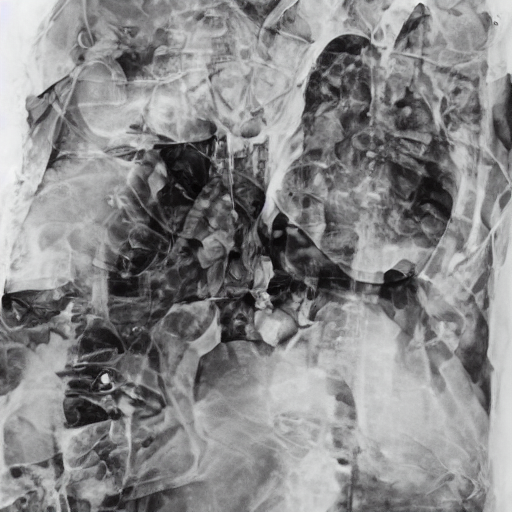

In [11]:
from diffusers import StableDiffusionPipeline, UNet2DConditionModel
import torch
model_path = "/local/home/hhamidi/t_dif/diffusers/examples/text_to_image/mimic-2/checkpoint-9500"

unet = UNet2DConditionModel.from_pretrained(model_path + "/unet", torch_dtype=torch.float16)
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", unet=unet, torch_dtype=torch.float16)
pipe.to("cuda")

pipe(prompt="").images[0]


In [15]:
import glob

all_images = glob.glob("/local/data/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/*/*/*.jpg")
all_text = ["a photo of a person with pneumonia"] * len(all_images)
all_lables = [[0.0, 0.0, 0.0]] * len(all_images)

In [16]:
from datasets import Dataset, Image
dataset = Dataset.from_dict({"image": all_images,"text":all_text,"lables":all_lables}).cast_column("image", Image())

In [13]:
from torchvision import transforms
import glob
from datasets import Dataset, Image
dataset_config_name = "mimic-cxr"
if dataset_config_name  in ["mimic-cxr"]:
            composed_transform = transforms.Compose([
                                                            transforms.RandomRotation(degrees=5),
                                                            transforms.Resize(256),
                                                            transforms.CenterCrop(256)

                                                        ])

            # Define the transform function
            def transforms_of_interest(examples):
                    examples["image"] = [composed_transform(image.convert('RGB')) for image in examples["image"]]
                    return examples


            all_images = glob.glob("/local/data/physionet.org/files/mimic-cxr-jpg/2.0.0/files/*/*/*/*.jpg")
            all_text = ["a photo of a person with pneumonia"] * len(all_images)
            all_lables = [[0.0, 0.0, 0.0]] * len(all_images)
            dataset = Dataset.from_dict({"image": all_images,"text":all_text,"lables":all_lables}).cast_column("image", Image())
            # Apply the transform to the dataset
            dataset.set_transform(transforms_of_interest)
            print("+"*100)
            print(f"Custome dataset {dataset_config_name} loaded")
            print("+"*100)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Custome dataset mimic-cxr loaded
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [14]:
dataset.column_names

['image', 'text', 'lables']

In [11]:
from datasets import load_dataset

dataset1 = load_dataset("rotten_tomatoes")
dataset1

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

In [11]:
import torch
from diffusers import StableDiffusionPipeline

model_path = "/local/home/hhamidi/t_dif/diffusers/examples/text_to_image/mimic-2"
ldm = StableDiffusionPipeline.from_pretrained(model_path, cache_dir="/local/home/hhamidi/t_dif/diffusers/examples/text_to_image")
ldm.to("cuda")



OSError: Error no file named model_index.json found in directory /local/home/hhamidi/t_dif/diffusers/examples/text_to_image/mimic-2.

In [16]:
import torch
from diffusers import StableDiffusionPipeline, UNet2DConditionModel

model_path = "/local/home/hhamidi/t_dif/diffusers/examples/text_to_image/mimic-1"
unet = UNet2DConditionModel.from_pretrained(model_path + '/checkpoint-2500/unet', torch_dtype=torch.float16)

pipe = StableDiffusionPipeline.from_pretrained(model_path, unet=unet, torch_dtype=torch.float16)
pipe.to("cuda")




Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

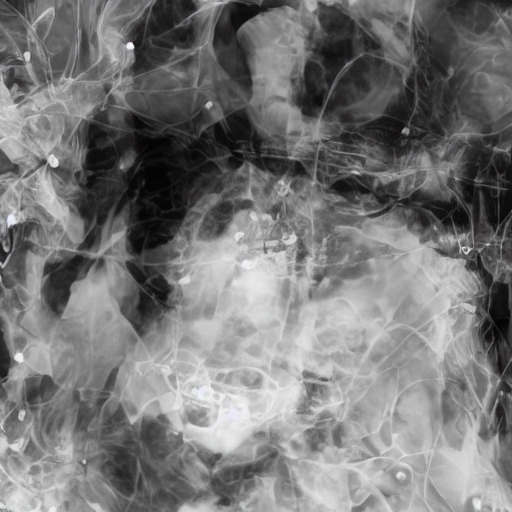

: 

In [22]:
pipe(prompt="").images[0]

In [10]:
# train unconditional diffusion model
from diffusers import AutoencoderKL
model_path = "/local/home/hhamidi/t_dif/diffusers/examples/text_to_image/models--CompVis--stable-diffusion-v1-4/snapshots/133a221b8aa7292a167afc5127cb63fb5005638b"
vae = AutoencoderKL.from_pretrained(model_path,subfolder="vae").to("cuda")

In [31]:
vae
# test vae
import torch

# Create a random input tensor with expected shape
input_tensor = torch.randn(1, 3, vae.sample_size, vae.sample_size).to("cuda")
    
vae.encode(input_tensor).latent_dist.sample().shape

/tmp/ipykernel_2555704/1599196274.py:6: FutureWarning: Accessing config attribute `sample_size` directly via 'AutoencoderKL' object attribute is deprecated. Please access 'sample_size' over 'AutoencoderKL's config object instead, e.g. 'unet.config.sample_size'.
  input_tensor = torch.randn(1, 3, vae.sample_size, vae.sample_size).to("cuda")


torch.Size([1, 4, 64, 64])

In [13]:
CUDA_VISIBLE_DEVICES=2,3 accelerate launch --config_file accelerator_gpu.json  --mixed_precision="fp16"  train_text_to_image_MVAE_MLP.py --pretrained_model_name_or_path="/local/home/hhamidi/t_dif/diffusers/examples/text_to_image/mimic-lr0001" --dataset_name="mimic-cxr" --use_ema --resolution=224 --center_crop --random_flip --train_batch_size=24  --gradient_accumulation_steps=1 --gradient_checkpointing --max_train_steps=5000 --learning_rate=0.0001  --lr_scheduler="constant" --lr_warmup_steps=0 --output_dir="./checkpoints/mimic-lr001-224-second-round-training"

AutoencoderKLOutput(latent_dist=<diffusers.models.autoencoders.vae.DiagonalGaussianDistribution object at 0x7fa05345f520>)

In [ ]:
CUDA_VISIBLE_DEVICES=2,3 accelerate launch --config_file accelerator_gpu.json  --mixed_precision="fp16"  text_to_image_simple.py  --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4" --dataset_name="mimic-cxr"  --train_batch_size=24  --gradient_accumulation_steps=1  --max_train_steps=10000 --learning_rate=0.0001  --lr_scheduler="constant" --lr_warmup_steps=0 --output_dir="./checkpoints/mimic-mlp-0001"

In [2]:
import numpy as np
import torch

def VAEMemory(paths):
    """
    Load and convert a batch of latent variables stored in .npy files to a PyTorch tensor.

    Args:
        paths (list of str): A list containing the file paths to the latent variable files.

    Returns:
        torch.Tensor: A tensor containing the batch of latent variables. The tensor shape is
                      determined by the contents of the files and is expected to be 
                      (batch_size, sequence_length, feature_dim).

    Raises:
        FileNotFoundError: If any of the files specified in paths does not exist.
        Exception: For other issues that may arise during file loading or tensor conversion.

    """
    latents = []
    for path in paths:
        try:
            # Attempt to load the numpy file from the specified path
            latent = np.load(path)
        except FileNotFoundError:
            # Handle cases where the file does not exist
            raise FileNotFoundError(f"The file at {path} was not found.")
        except Exception as e:
            # Handle other possible exceptions related to file loading
            raise Exception(f"An error occurred while loading {path}: {str(e)}")
        
        # Convert the numpy array to a PyTorch tensor and append to the list
        latents.append(torch.from_numpy(latent))

    # Stack all the tensors in the list to create a batch
    try:
        batch = torch.stack(latents, dim=0)
    except Exception as e:
        # Handle exceptions related to tensor stacking
        raise Exception(f"An error occurred during tensor stacking: {str(e)}")

    return batch.unsqueeze(1)   

# test this with 
base_path = "/local/home/hhamidi/t_dif/diffusers/examples/text_to_image/dataset/"
paths = '''files/p18/p18534568/s52103332/fdbde7d5-01a15150-4f118714-ae93ad2c-eeeee36f
files/p14/p14189556/s54421863/c4ee4d67-b4a78a63-57ad3c71-291ebe0c-5723d014
files/p18/p18118611/s50776659/cd2a4ef8-672d635e-5d65c064-53b477ee-118b8f2d
files/p12/p12148014/s54176970/030b2b70-cfb1adf3-f9d920c1-b4bf8a0b-7f7e1bd0
files/p15/p15479218/s55740897/0ae99acf-56149a5d-6cbbb7c4-422a1e88-6bb5814e
files/p18/p18716038/s59120255/b344f08a-c08a4343-e8d8af51-cf2f4522-23c31707
files/p17/p17517983/s51809383/dc582859-b73c0dea-da988c70-4d91b3a3-6829afec
files/p16/p16600921/s51703147/257957a3-f0c3f734-9a16ef0d-709e9607-dedd794b
files/p11/p11950244/s52563514/b880bf81-1c76c8b3-b3733255-eb11ada2-3f6ad339
files/p16/p16370710/s56524339/debed8d3-97a91dd5-82f33245-583fa2f3-57a91967
files/p14/p14328075/s52455302/a45b5220-17c7c46c-3cb047ca-bf78d4d1-a36b204c
files/p12/p12543111/s50736587/843ce431-317b1eae-19993b2d-75e2bc46-f35964d6
files/p14/p14602966/s56435466/44080a08-05987b2e-a9b02650-7fadeb47-dba90118
files/p13/p13406913/s53531860/8fc024d0-663f4e25-d4e0ef54-efe380d6-985166f6
files/p17/p17739294/s57585647/4d54d6d7-cbe1b137-e07912e2-1b27d6b2-e5323f4e
files/p13/p13859433/s56222792/5de01dc2-8d1ff0ae-052d8f21-03b56695-bdbc77db
files/p10/p10190130/s59492713/ddaa98b5-20406028-be990762-ecca908b-697c2f56
files/p16/p16686301/s55727490/bb96e80f-8c6f4ed3-d7a76a37-505e66da-5317f2d7
files/p11/p11303447/s53884863/56aa7f2f-8baad3f3-305a08e2-4a09d641-c4cb4069
files/p15/p15683514/s51228614/98b9e078-aa81b3dc-e265a745-f61e8d31-3b3efff7
files/p13/p13396545/s51951466/3f247805-645abced-e7526250-da463fcf-1f5a0f6c
files/p13/p13340840/s50615949/5a782e4f-a0634df2-30c0fbb6-b188f6fd-ac170c47
files/p16/p16654740/s56543599/b4724fd9-2d1ff314-d3923715-fa6c66f2-a0cfa7ed
files/p11/p11964399/s55628599/7d108b35-e4365a26-c557ecb6-f366e33f-e9d4bf6b
files/p15/p15425143/s56929064/aaba892a-7553a203-1bee41a6-a3bbe2b4-23dfb4d4
files/p18/p18056245/s50392924/f187e315-92aa9349-f5e1f926-25681358-92b147d6
files/p17/p17156219/s59729545/32e54473-f46dcd41-1ff111b0-4fdcf392-bc369888
files/p10/p10312715/s55578307/05848b6c-1e717e60-38d1ee60-ab96547e-e0657857
files/p13/p13358539/s56012912/87f0ede1-cd013f58-a33fecda-c59586a3-2086e983
files/p12/p12190122/s56982144/b1c10762-d717b4d4-8bcba0c9-1eddd2c9-347b5be1'''
paths = [ base_path + pth + ".npy" for pth in paths.split("\n")]
print(paths)

VAEMemory(paths)


['/local/home/hhamidi/t_dif/diffusers/examples/text_to_image/dataset/files/p18/p18534568/s52103332/fdbde7d5-01a15150-4f118714-ae93ad2c-eeeee36f.npy', '/local/home/hhamidi/t_dif/diffusers/examples/text_to_image/dataset/files/p14/p14189556/s54421863/c4ee4d67-b4a78a63-57ad3c71-291ebe0c-5723d014.npy', '/local/home/hhamidi/t_dif/diffusers/examples/text_to_image/dataset/files/p18/p18118611/s50776659/cd2a4ef8-672d635e-5d65c064-53b477ee-118b8f2d.npy', '/local/home/hhamidi/t_dif/diffusers/examples/text_to_image/dataset/files/p12/p12148014/s54176970/030b2b70-cfb1adf3-f9d920c1-b4bf8a0b-7f7e1bd0.npy', '/local/home/hhamidi/t_dif/diffusers/examples/text_to_image/dataset/files/p15/p15479218/s55740897/0ae99acf-56149a5d-6cbbb7c4-422a1e88-6bb5814e.npy', '/local/home/hhamidi/t_dif/diffusers/examples/text_to_image/dataset/files/p18/p18716038/s59120255/b344f08a-c08a4343-e8d8af51-cf2f4522-23c31707.npy', '/local/home/hhamidi/t_dif/diffusers/examples/text_to_image/dataset/files/p17/p17517983/s51809383/dc58285

torch.Size([30, 1, 768])

In [4]:
def VAEMemory(paths):
    """
    Load and convert a batch of latent variables stored in .npy files to a PyTorch tensor.

    Args:
        paths (list of str): A list containing the file paths to the latent variable files.

    Returns:
        torch.Tensor: A tensor containing the batch of latent variables. The tensor shape is
                      determined by the contents of the files and is expected to be 
                      (batch_size, sequence_length, feature_dim).

    Raises:
        FileNotFoundError: If any of the files specified in paths does not exist.
        Exception: For other issues that may arise during file loading or tensor conversion.

    """
    latents = []
    for path in paths:
        try:
            # Attempt to load the numpy file from the specified path
            latent = np.load(path)
        except FileNotFoundError:
            # Handle cases where the file does not exist
            raise FileNotFoundError(f"The file at {path} was not found.")
        except Exception as e:
            # Handle other possible exceptions related to file loading
            raise Exception(f"An error occurred while loading {path}: {str(e)}")
        
        # Convert the numpy array to a PyTorch tensor and append to the list
        latents.append(torch.from_numpy(latent))

    # Stack all the tensors in the list to create a batch
    try:
        batch = torch.stack(latents, dim=0)
    except Exception as e:
        # Handle exceptions related to tensor stacking
        raise Exception(f"An error occurred during tensor stacking: {str(e)}")

    return batch


base_path = "/local/data/vae_latent/files/mimic-cxr-jpg/2.0.0/"
paths = '''files/p18/p18534568/s52103332/fdbde7d5-01a15150-4f118714-ae93ad2c-eeeee36f
files/p14/p14189556/s54421863/c4ee4d67-b4a78a63-57ad3c71-291ebe0c-5723d014
files/p18/p18118611/s50776659/cd2a4ef8-672d635e-5d65c064-53b477ee-118b8f2d
files/p12/p12148014/s54176970/030b2b70-cfb1adf3-f9d920c1-b4bf8a0b-7f7e1bd0
files/p15/p15479218/s55740897/0ae99acf-56149a5d-6cbbb7c4-422a1e88-6bb5814e
files/p18/p18716038/s59120255/b344f08a-c08a4343-e8d8af51-cf2f4522-23c31707
files/p17/p17517983/s51809383/dc582859-b73c0dea-da988c70-4d91b3a3-6829afec
files/p16/p16600921/s51703147/257957a3-f0c3f734-9a16ef0d-709e9607-dedd794b
files/p11/p11950244/s52563514/b880bf81-1c76c8b3-b3733255-eb11ada2-3f6ad339
files/p16/p16370710/s56524339/debed8d3-97a91dd5-82f33245-583fa2f3-57a91967
files/p14/p14328075/s52455302/a45b5220-17c7c46c-3cb047ca-bf78d4d1-a36b204c
files/p12/p12543111/s50736587/843ce431-317b1eae-19993b2d-75e2bc46-f35964d6
files/p14/p14602966/s56435466/44080a08-05987b2e-a9b02650-7fadeb47-dba90118
files/p13/p13406913/s53531860/8fc024d0-663f4e25-d4e0ef54-efe380d6-985166f6
files/p17/p17739294/s57585647/4d54d6d7-cbe1b137-e07912e2-1b27d6b2-e5323f4e
files/p13/p13859433/s56222792/5de01dc2-8d1ff0ae-052d8f21-03b56695-bdbc77db
files/p10/p10190130/s59492713/ddaa98b5-20406028-be990762-ecca908b-697c2f56
files/p16/p16686301/s55727490/bb96e80f-8c6f4ed3-d7a76a37-505e66da-5317f2d7
files/p11/p11303447/s53884863/56aa7f2f-8baad3f3-305a08e2-4a09d641-c4cb4069
files/p15/p15683514/s51228614/98b9e078-aa81b3dc-e265a745-f61e8d31-3b3efff7
files/p13/p13396545/s51951466/3f247805-645abced-e7526250-da463fcf-1f5a0f6c
files/p13/p13340840/s50615949/5a782e4f-a0634df2-30c0fbb6-b188f6fd-ac170c47
files/p16/p16654740/s56543599/b4724fd9-2d1ff314-d3923715-fa6c66f2-a0cfa7ed
files/p11/p11964399/s55628599/7d108b35-e4365a26-c557ecb6-f366e33f-e9d4bf6b
files/p15/p15425143/s56929064/aaba892a-7553a203-1bee41a6-a3bbe2b4-23dfb4d4
files/p18/p18056245/s50392924/f187e315-92aa9349-f5e1f926-25681358-92b147d6
files/p17/p17156219/s59729545/32e54473-f46dcd41-1ff111b0-4fdcf392-bc369888
files/p10/p10312715/s55578307/05848b6c-1e717e60-38d1ee60-ab96547e-e0657857
files/p13/p13358539/s56012912/87f0ede1-cd013f58-a33fecda-c59586a3-2086e983
files/p12/p12190122/s56982144/b1c10762-d717b4d4-8bcba0c9-1eddd2c9-347b5be1'''
paths = [ base_path + pth + ".jpg_latent.npy" for pth in paths.split("\n")]
print(paths)

VAEMemory(paths).shape


['/local/data/vae_latent/files/mimic-cxr-jpg/2.0.0/files/p18/p18534568/s52103332/fdbde7d5-01a15150-4f118714-ae93ad2c-eeeee36f.jpg_latent.npy', '/local/data/vae_latent/files/mimic-cxr-jpg/2.0.0/files/p14/p14189556/s54421863/c4ee4d67-b4a78a63-57ad3c71-291ebe0c-5723d014.jpg_latent.npy', '/local/data/vae_latent/files/mimic-cxr-jpg/2.0.0/files/p18/p18118611/s50776659/cd2a4ef8-672d635e-5d65c064-53b477ee-118b8f2d.jpg_latent.npy', '/local/data/vae_latent/files/mimic-cxr-jpg/2.0.0/files/p12/p12148014/s54176970/030b2b70-cfb1adf3-f9d920c1-b4bf8a0b-7f7e1bd0.jpg_latent.npy', '/local/data/vae_latent/files/mimic-cxr-jpg/2.0.0/files/p15/p15479218/s55740897/0ae99acf-56149a5d-6cbbb7c4-422a1e88-6bb5814e.jpg_latent.npy', '/local/data/vae_latent/files/mimic-cxr-jpg/2.0.0/files/p18/p18716038/s59120255/b344f08a-c08a4343-e8d8af51-cf2f4522-23c31707.jpg_latent.npy', '/local/data/vae_latent/files/mimic-cxr-jpg/2.0.0/files/p17/p17517983/s51809383/dc582859-b73c0dea-da988c70-4d91b3a3-6829afec.jpg_latent.npy', '/loc

torch.Size([30, 4, 64, 64])